In [1]:
#importing the libraries that are needed to perform the EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# lets read data using read_csv
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000.0,29900000.0,12.0,778,NaN,17600000.0,22700000.0,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382,12400000.0,8200000.0,29400000.0,NaN,Rejected


In [3]:
print("number of rows",df.shape[0])
print("number of columns",df.shape[1])

number of rows 4269
number of columns 13


In [4]:
df.columns
#we could see every column name starting with space lets trimor strip out that spaces

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.columns=[i.strip() for i in df.columns]
df.columns #this removed all the spaces from each column name

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [6]:
train, test = train_test_split(df, test_size=0.20, random_state=42)#training=68% and teting=33%

In [7]:
train.shape

(3415, 13)

In [8]:
test.shape

(854, 13)

In [9]:
train.info() #this gives the columns and shows count of non null values in each column 
#we could see there are null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3415 entries, 1675 to 860
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   3415 non-null   int64  
 1   no_of_dependents          3404 non-null   float64
 2   education                 3407 non-null   object 
 3   self_employed             3411 non-null   object 
 4   income_annum              3410 non-null   float64
 5   loan_amount               3410 non-null   float64
 6   loan_term                 3410 non-null   float64
 7   cibil_score               3415 non-null   int64  
 8   residential_assets_value  3411 non-null   float64
 9   commercial_assets_value   3413 non-null   float64
 10  luxury_assets_value       3413 non-null   float64
 11  bank_asset_value          3411 non-null   float64
 12  loan_status               3415 non-null   object 
dtypes: float64(8), int64(2), object(3)
memory usage: 373.5+ KB


In [10]:
for i in train.columns:
    print(i,train[i].isnull().sum()) 
#like this also you can see the count of null values of each column

loan_id 0
no_of_dependents 11
education 8
self_employed 4
income_annum 5
loan_amount 5
loan_term 5
cibil_score 0
residential_assets_value 4
commercial_assets_value 2
luxury_assets_value 2
bank_asset_value 4
loan_status 0


In [11]:
#lets check what are categorical variables and what are numerical variables
train.describe() #this takes only the numerical variables and gives some basic stats

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,3415.000000,3404.000000,3.410000e+03,3.410000e+03,3410.000000,3415.000000,3.411000e+03,3.413000e+03,3.413000e+03,3.411000e+03
mean,2149.488141,2.430964,5.064047e+06,1.517196e+07,10.916129,600.263543,7.471240e+06,4.950718e+06,1.518652e+07,4.947904e+06
std,1224.205641,1.696202,2.812196e+06,9.067579e+06,5.722896,172.188706,6.546442e+06,4.370093e+06,9.175575e+06,3.232274e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1089.500000,1.000000,2.700000e+06,7.800000e+06,6.000000,454.000000,2.100000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2151.000000,2.000000,5.100000e+06,1.460000e+07,10.000000,603.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.500000e+06
75%,3206.500000,4.000000,7.500000e+06,2.147500e+07,16.000000,747.500000,1.120000e+07,7.500000e+06,2.180000e+07,7.000000e+06
max,4268.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [12]:
print("numerical columns are ",train.describe().columns)
print("categorical columns are ",[i for i in train.columns if i not in train.describe().columns])

numerical columns are  Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')
categorical columns are  ['education', 'self_employed', 'loan_status']


 Approved    2120
 Rejected    1295
Name: loan_status, dtype: int64


<AxesSubplot:>

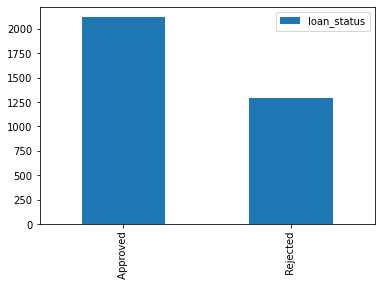

In [13]:
## lets see the distribution of our output variable whether data is balanced or imbalanced
print(train["loan_status"].value_counts())
train["loan_status"].value_counts().plot(kind="bar",legend=True)

In [14]:
print("The Approved percentage of points in training data",(train[train["loan_status"]==" Approved"].shape[0]/train.shape[0])*100)
print("The Rejected percentage of points in training data",(train[train["loan_status"]==" Rejected"].shape[0]/train.shape[0])*100)
#from this we could say data is almost balanced

The Approved percentage of points in training data 62.079062957540266
The Rejected percentage of points in training data 37.920937042459734


In [17]:
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index=False)